# Autocorrelation and Partial Autocorrelation

Autocorrelation and Partial Autocorrelation are foundational concepts in time series analysis, which is pivotal for both interpolation and extrapolation tasks as previously discussed. These concepts help in modeling and forecasting time series data by explaining the internal structure of the series. Let's break this down step-by-step according to your questions.

## Simple Explanations



- **Autocorrelation**: This is a measurement of the relationship between a time series with a lagged version of itself. For instance, in daily temperature readings, how today's temperature correlates with yesterday's or last week's. It helps identify repeating patterns or cycles in the data.

- **Partial Autocorrelation**: This measures the correlation between a time series and its lag, controlling for the values of the intervals between. It provides a correlation between observations at two points in time, accounting for how the observations between those points affect their relationship.


## Mathematical Explanation



Let's mathematically define these terms and use a simple example to illustrate:

- **Mathematical Definition of Autocorrelation** (ACF):
  The autocorrelation for a time series $ y_t $ at lag $ k $ is defined as:
  $$
  \text{ACF}(k) = \frac{\sum_{t=1}^{n-k} (y_t - \overline{y})(y_{t+k} - \overline{y})}{\sum_{t=1}^{n} (y_t - \overline{y})^2}
  $$
  where $ \overline{y} $ is the mean of $ y $.

- **Mathematical Definition of Partial Autocorrelation** (PACF):
  The partial autocorrelation at lag $ k $ is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

In [31]:
import numpy as np

# Function to calculate autocorrelation at a specific lag using the formula
def autocorrelation(y, lag):
    if lag == 0:
        return 1  # Autocorrelation at lag 0 is always 1
    y_bar = np.mean(y)
    numerator = np.sum((y[:-lag] - y_bar) * (y[lag:] - y_bar))
    denominator = np.sum((y - y_bar) ** 2)
    return numerator / denominator

def partial_autocorrelation(y, lag):
    pacf = [1]  # PACF is always 1 at lag 0
    for l in range(1, lag+1):
        # We find the partial correlation for lag l by regressing y on its lags
        X = np.column_stack([y[l-i:-i] for i in range(1, l+1)])
        X = np.column_stack([np.ones(len(X)), X])  # Add the intercept term
        beta = np.linalg.inv(X.T @ X) @ X.T @ y[l:]
        pacf.append(beta[1])  # The PACF is the coefficient of the last lag
    return pacf

# Generate a sample dataset
np.random.seed(1) # For reproducibility
sample_data = np.random.randn(100) # Randomly generated data

# Calculate ACF and PACF for lags up to 3
acf_values = [autocorrelation(sample_data, lag) for lag in range(4)]
pacf_values = partial_autocorrelation(sample_data, 3)

print(f"The first 5 sample data: {sample_data[:5]}")

print(f"ACF : {acf_values}")
print(f"PACF: {pacf_values}")

The first 5 sample data: [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
ACF : [1, -0.03913034695671644, 0.007913953300971928, -0.23943666219962997]
PACF: [1, -0.03946560317677712, -0.026717780736806238, -0.029915647487628174]


## Implementation

Suppose you have a time series data \( Y = [4, 5, 6, 7, 8] \). Let's calculate the autocorrelation at lag 1.

In [18]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Seed the random number generator for reproducibility
np.random.seed(42)

# Generate sample data
random_data = np.random.randn(100)  # Random data
trend_data = np.arange(100)  # Trend data
seasonal_data = np.sin(np.linspace(0, 20 * np.pi, 100))  # Seasonal data

# Autocorrelation
acf = sm.tsa.acf(random_data, nlags=5)
print("Autocorrelation of random data at lag 1:", acf[5])

acf = sm.tsa.acf(trend_data, nlags=5)
print("Autocorrelation of trend data at lag 1:", acf[5])

acf = sm.tsa.acf(seasonal_data, nlags=5)
print("Autocorrelation of seasonal data at lag 1:", acf[5])

# Partial Autocorrelation
pacf = sm.tsa.pacf(random_data, nlags=5)
print("Partial Autocorrelation of random data at lag 1:", pacf[5])

pacf = sm.tsa.pacf(trend_data, nlags=5)
print("Partial Autocorrelation of trend data at lag 1:", pacf[5])

pacf = sm.tsa.pacf(seasonal_data, nlags=5)
print("Partial Autocorrelation of seasonal data at lag 1:", pacf[5])

# Function to compute and plot ACF and PACF
def plot_correlations(data, title):
    acf = sm.tsa.acf(data, nlags=20)
    pacf = sm.tsa.pacf(data, nlags=20)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sm.graphics.tsa.plot_acf(data, lags=20, ax=axes[0])
    sm.graphics.tsa.plot_pacf(data, lags=20, ax=axes[1])
    plt.suptitle(title)

Autocorrelation of random data at lag 1: 0.19410542424127566
Autocorrelation of trend data at lag 1: 0.8502400240024005
Autocorrelation of seasonal data at lag 1: -0.9494521912926798
Partial Autocorrelation of random data at lag 1: 0.20070498438754186
Partial Autocorrelation of trend data at lag 1: -0.020901230088520767
Partial Autocorrelation of seasonal data at lag 1: -1.0601424541761015


Autocorrelation (ACF) for lag \( k \) is the correlation between a series and its own lagged values, measuring the entire direct and indirect influence of past values. It can be affected by the series's correlation at all shorter lags.

Partial autocorrelation (PACF), on the other hand, is the correlation between a series and its lagged values after removing the effects of correlations due to the terms at shorter lags.

To demonstrate these concepts, let's consider three different time series data samples:

1. **Random Data**: Should show low or no autocorrelation because each value is independent of the past values.
2. **Trend Data**: A linearly increasing or decreasing series should show high autocorrelation because past values are strongly predictive of future values.
3. **Seasonal Data**: A series with a repeating pattern should show significant autocorrelation at lags corresponding to the pattern's frequency.

Here's an updated code that will create these three samples, compute ACF and PACF, and then plot them to show where and why there is autocorrelation and partial autocorrelation.

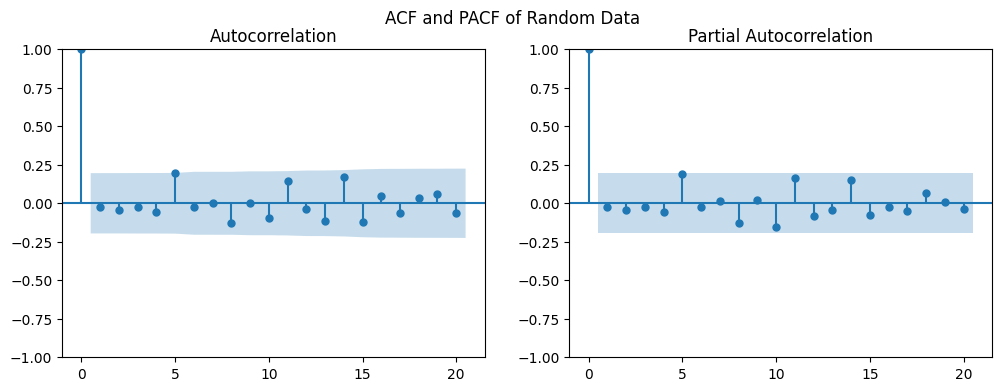

In [10]:
# Plot correlations for random data
plot_correlations(random_data, 'ACF and PACF of Random Data')
plt.show()

**Random Data Result**:

The provided graphs represent the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for a dataset with random data. 

In the ACF plot on the left, we observe that the correlation at lag 0 is 1, as expected, since each data point is perfectly correlated with itself. For subsequent lags, the autocorrelations hover around zero, within the blue shaded area that represents the confidence interval. This indicates that there is no significant autocorrelation at these lags, as we would expect for random data. If the points were outside the blue shaded area, that would indicate significant autocorrelation.

In the PACF plot on the right, the same is generally true. The correlation at lag 0 is 1, and subsequent lags tend to be insignificant, mostly lying within the blue shaded confidence interval. The PACF shows a similar pattern because, for random data, once the direct correlation at lag 1 is accounted for, there should be no remaining correlation at higher lags if the data is truly random.

Each value in the sequence is independent of the others. This is a key diagnostic feature of white noise in time series analysis.

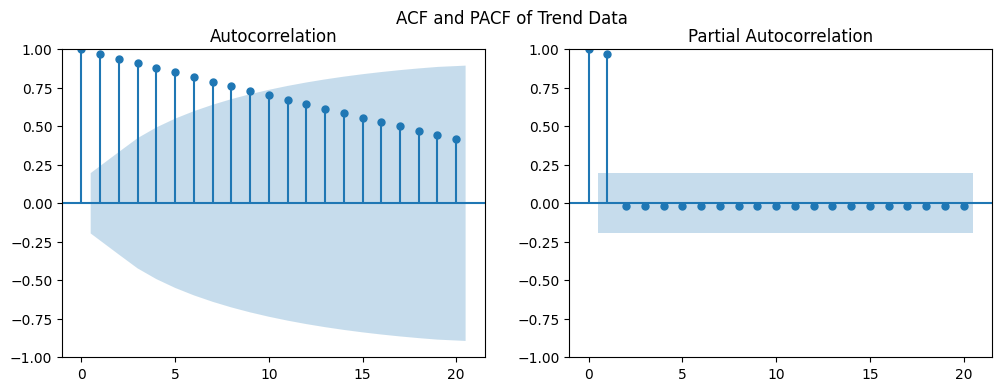

In [8]:
# Plot correlations for trend data
plot_correlations(trend_data, 'ACF and PACF of Trend Data')
plt.show()

**Trend Data Results**:

In the ACF plot on the left, the autocorrelations start high at lag 0 and gradually decrease as the lags increase. This pattern is typical for trended data because observations closer in time are more similar to each other due to the underlying trend. As the lags increase, the similarity decreases, leading to the declining values in the autocorrelation. However, since the data has a deterministic trend, the autocorrelation is still relatively high even at higher lags.

The PACF plot on the right shows a sharp drop after the first lag. This indicates that once the immediate past value is accounted for, the additional lags do not provide much more information about the series. This is a characteristic of a time series where the trend is the primary structure in the data, and once that trend is accounted for by the immediate past value, the remaining variations are not significantly correlated with past values.

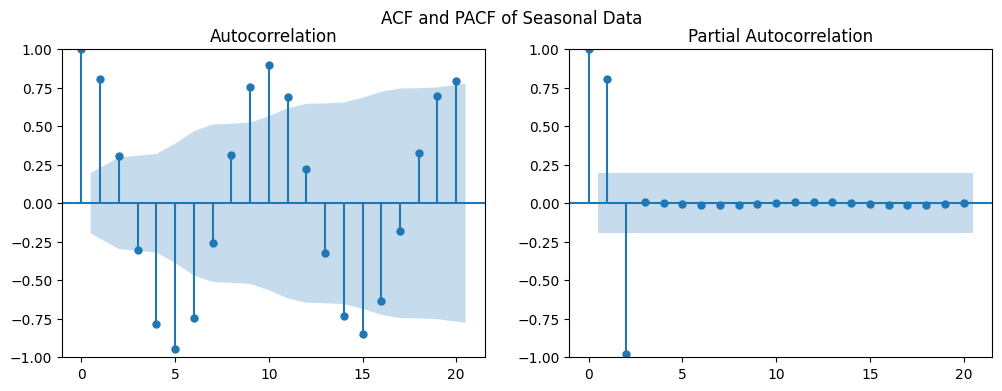

In [9]:
# Plot correlations for seasonal data
plot_correlations(seasonal_data, 'ACF and PACF of Seasonal Data')
plt.show()

**Seasonal Data Results**:

In the ACF plot on the left, the presence of peaks at regular intervals indicates a repeating pattern in the data at those lags. This is a classic sign of seasonality. The seasonality is shown by the significant autocorrelations at specific lags which are the points where the seasonal pattern completes a cycle and starts again. This could represent, for instance, daily temperature fluctuations, monthly sales cycles, or any other type of pattern that repeats at a regular interval.

The PACF plot on the right shows significant correlation at the first lag and possibly at other lags, but the pattern is not as clear as in the ACF plot. This could indicate that the seasonal effect is being captured by the ACF, and once you account for that effect, the additional explanatory power of further lags is limited.